In [14]:
import pandas as pd
import numpy as  np

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Read Data
data = pd.read_csv('hotel_booking.csv')

In [16]:
data.shape

(119390, 36)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Checking null values

In [18]:
data.columns[data.isnull().sum()>0]

Index(['children', 'country', 'agent', 'company'], dtype='object')

```
There are four features have null values 
1.childern
2.Country
3.Agent 
4.Company
```

### Hotel Type

<AxesSubplot:xlabel='is_canceled', ylabel='total'>

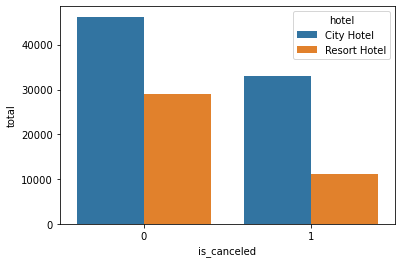

In [19]:
data.groupby('hotel')['is_canceled'].value_counts()
var1 = data.groupby('hotel')['is_canceled'].value_counts().rename('total').reset_index()
sns.barplot(data =var1, x = 'is_canceled', y ='total',hue='hotel' )

```
From Above graph we can see that city hotel have more no. of cancelations 
which is 33102 and resort hotel have 11122 cancelations
```

### Lead Time

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


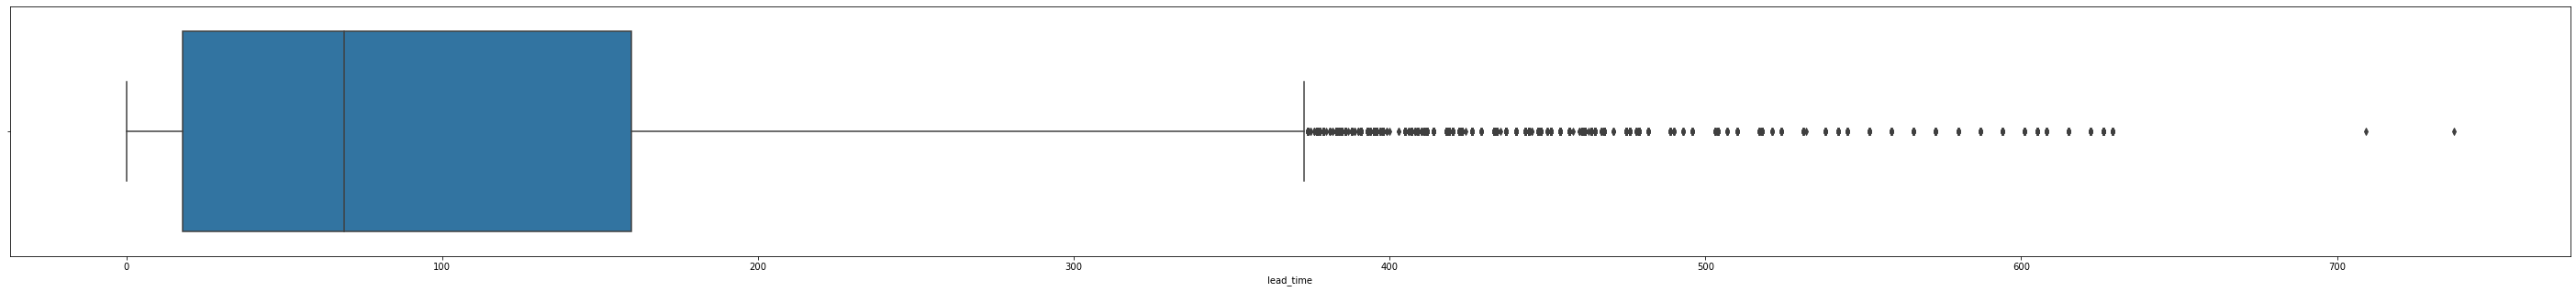

In [20]:
plt.figure(figsize=(50,5))
sns.boxplot(data.lead_time)
#plt.rcParams[] = 20
plt.show()

```
from above box plot there are more number of outliers present in lead time feature.
```

In [21]:
data['lead_cut'] = pd.cut(data.lead_time,[0,10,20,30,60,90,120,150,180,240,360,99999],
            labels=['<10','10-20','20-30','1-2m','2-3m','3-4m','4-5m','5-6m','6-8m','8-12m','>1yr'])

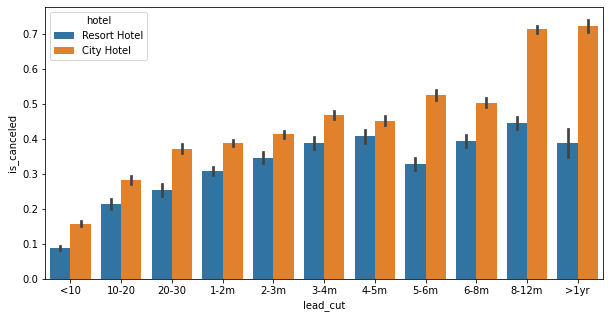

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data = data, x = 'lead_cut', y ='is_canceled',hue='hotel' )
plt.show()

```
There is 70% chance of cancelation of booking when lead time is more than 8 months
```

In [23]:
x = pd.DataFrame(data.arrival_date_year.value_counts())
x['Canceled'] = data.arrival_date_year[data.is_canceled == 1].value_counts()
x.columns = ['Total', 'Canceled']
x['Year'] = x.index.tolist()
x

,Total,Canceled,Year
2016,56707,20337,2016
2017,40687,15745,2017
2015,21996,8142,2015


<AxesSubplot:xlabel='Year'>

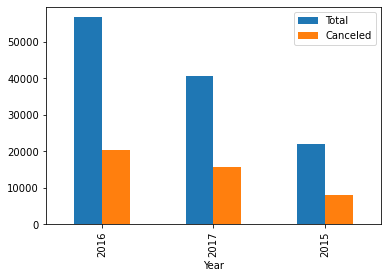

In [24]:
x.plot(x = 'Year',kind ='bar')

In [25]:
arrival_year = data.groupby('arrival_date_year')['is_canceled'].value_counts().rename('Total').reset_index()
arrival_year.columns = ['Year', 'is_canceled', 'Total']
arrival_year.is_canceled.replace({0: 'No', 1: "Yes"},inplace=True)
arrival_year

,Year,is_canceled,Total
0,2015,No,13854
1,2015,Yes,8142
2,2016,No,36370
3,2016,Yes,20337
4,2017,No,24942
5,2017,Yes,15745


<AxesSubplot:xlabel='Year', ylabel='Total'>

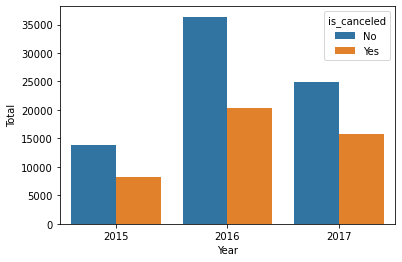

In [26]:
sns.barplot(data = arrival_year, x='Year',y = 'Total', hue = 'is_canceled')